In [3]:
from datasets import load_dataset

ds = load_dataset("Artificio/WikiArt_Full")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/780 [00:00<?, ?B/s]

(…)-00000-of-00007-dd79acf31a667474.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

(…)-00001-of-00007-16d737d74ca9cb8a.parquet:   0%|          | 0.00/463M [00:00<?, ?B/s]

(…)-00002-of-00007-73e15989674f270b.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00003-of-00007-911b21abee70c83e.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00004-of-00007-a49c31eac1929942.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00005-of-00007-053e48131b243ec0.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

(…)-00006-of-00007-daeb2ac40cedaee0.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/103250 [00:00<?, ? examples/s]

In [ ]:
type(ds['train'][0]['image'])

PIL.JpegImagePlugin.JpegImageFile

array([[[125, 182, 147],
        [123, 181, 143],
        [124, 182, 144],
        ...,
        [133, 192, 126],
        [134, 193, 127],
        [136, 195, 129]],

       [[134, 191, 156],
        [130, 187, 152],
        [127, 185, 147],
        ...,
        [136, 195, 129],
        [138, 197, 131],
        [140, 199, 133]],

       [[141, 198, 163],
        [135, 192, 157],
        [131, 189, 151],
        ...,
        [136, 195, 131],
        [137, 196, 132],
        [138, 197, 133]],

       ...,

       [[ 69,  69,  59],
        [ 59,  61,  50],
        [ 52,  53,  45],
        ...,
        [120, 102,  62],
        [124, 102,  65],
        [123, 101,  64]],

       [[ 80,  78,  65],
        [ 62,  60,  47],
        [ 69,  69,  57],
        ...,
        [117, 104,  62],
        [124, 106,  68],
        [124, 106,  70]],

       [[113, 110,  95],
        [ 98,  96,  81],
        [ 78,  76,  64],
        ...,
        [123, 111,  69],
        [130, 114,  78],
        [131, 115,  79]]], dtype=uint8)
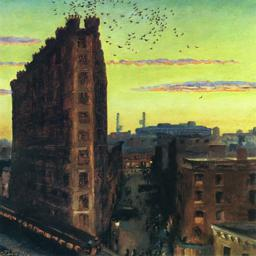

In [ ]:
import numpy as np

img = np.array(ds['train'][0]['image'])

img

### CuPy generator:

Time: 15.617240190505981


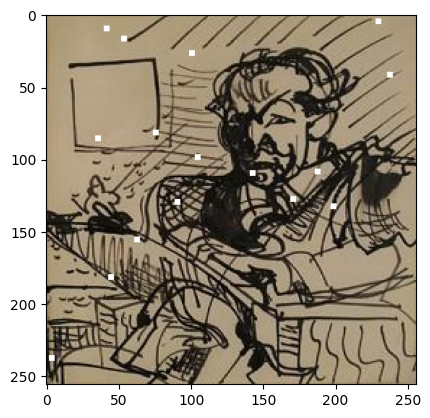

In [ ]:
import cupy as cp
import matplotlib.pyplot as plt
import time


def generate_damage(image: cp.ndarray, square_side=4, n_squares=16) -> cp.ndarray:
    damage = cp.full((square_side, square_side, 3), 255)

    for _ in range(n_squares):
        x = cp.random.randint(0, 256 - square_side)
        y = cp.random.randint(0, 256 - square_side)

        image[x:x+square_side, y:y+square_side] = damage

    return image

start = time.time()
for i in range(1000):
    image_original = cp.array(ds['train'][i]['image'])
    image = generate_damage(image_original.copy())
end = time.time()

print(f'Time: {end - start}')

plt.imshow(cp.asnumpy(image))
plt.show()

### skimage generator:

Time: 5.241137981414795


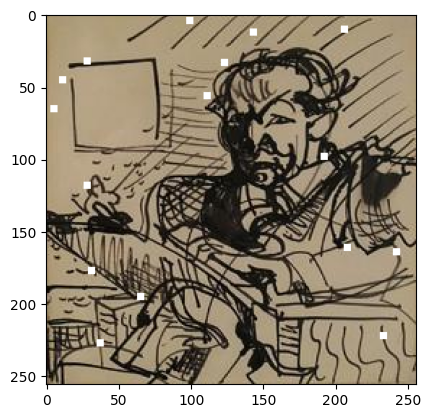

In [ ]:
import numpy as np
from skimage import draw
import time


def generate_damage(image: np.ndarray, square_side=4, n_squares=16) -> np.ndarray:
    for _ in range(n_squares):
        x = np.random.randint(0, 256 - square_side)
        y = np.random.randint(0, 256 - square_side)

        row, col = draw.rectangle(start=(x, y), end=(x+square_side, y+square_side))

        image[row, col] = 255

    return image

start = time.time()
for i in range(1000):
    image_original = np.array(ds['train'][i]['image'])
    image = generate_damage(image_original.copy())
end = time.time()
print(f'Time: {end - start}')

plt.imshow(image)
plt.show()

### NumPy generator:

Time: 3.475041389465332


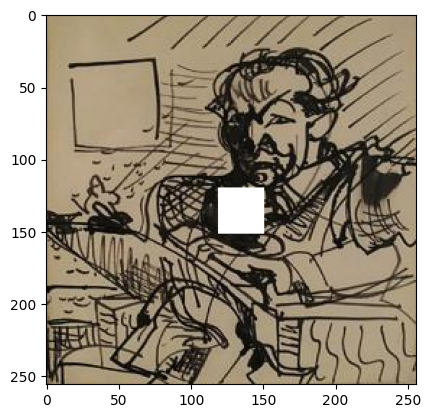

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time


def generate_damage(image: np.ndarray, square_side=4, n_squares=16) -> np.ndarray:
    damage = np.full((square_side, square_side, 3), 255)

    for _ in range(n_squares):
        x = np.random.randint(0, 256 - square_side)
        y = np.random.randint(0, 256 - square_side)

        image[x:x+square_side, y:y+square_side] = damage

    return image

start = time.time()
for i in range(1000):
    image_original = np.array(ds['train'][i]['image'])
    image = generate_damage(image_original.copy(), square_side=32, n_squares=1)
end = time.time()

print(f'Time: {end - start}')

plt.imshow(image)
plt.show()

In [ ]:
for sample in ds['train']:
    image = sample['image']
    label = sample['style']

    print(f"Processing image with style: {label}")

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Processing image with style: Abstract Expressionism
Processing image with style: Surrealism
Processing image with style: Surrealism
Processing image with style: Post-Impressionism
Processing image with style: Mannerism (Late Renaissance)
Processing image with style: Impressionism
Processing image with style: Minimalism
Processing image with style: Abstract Expressionism
Processing image with style: Ukiyo-e
Processing image with style: Romanticism
Processing image with style: Impressionism
Processing image with style: Surrealism
Processing image with style: Precisionism
Processing image with style: Realism
Processing image with style: Impressionism
Processing image with style: Mannerism (Late Renaissance)
Processing image with style: Realism
Processing image with style: Surrealism
Processing image with style: Naïve Art (Primitivism)
Processing image with style: Impressionism
Processing image with style: Northern Renaissanc

h5py